## this notebook generates a flat sky map from a healpix curved sky map, for the purpose of testing HOS team WL NG stats code

In [2]:
import numpy as np
from scipy import *
from pylab import *
import healpy as hp
import os

In [3]:
### potentially useful package: https://orix.readthedocs.io/en/stable/reference.html#orix.projections.StereographicProjection
### useful notes: http://ugastro.berkeley.edu/radio/2017/handout_links/projections_lite.pdf

## get WMAP map for test
# ! wget -c http://lambda.gsfc.nasa.gov/data/map/dr4/skymaps/7yr/raw/wmap_band_iqumap_r9_7yr_W_v4.fits
#wget -c http://lambda.gsfc.nasa.gov/data/map/dr4/ancillary/masks/wmap_temperature_analysis_mask_r9_7yr_v4.fits --2022-06-08 23:19:40--  http://lambda.gsfc.nasa.gov/data/map/dr4/skymaps/7yr/raw/wmap_band_iqumap_r9_7yr_W_v4.fi

wmap_map_I = hp.read_map("wmap_band_iqumap_r9_7yr_W_v4.fits")

/global/homes/j/jialiu/.local/cori/3.7-anaconda-2019.10/lib/python3.7/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


/global/homes/j/jialiu/.local/cori/3.7-anaconda-2019.10/lib/python3.7/site-packages/healpy/fitsfunc.py:403: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


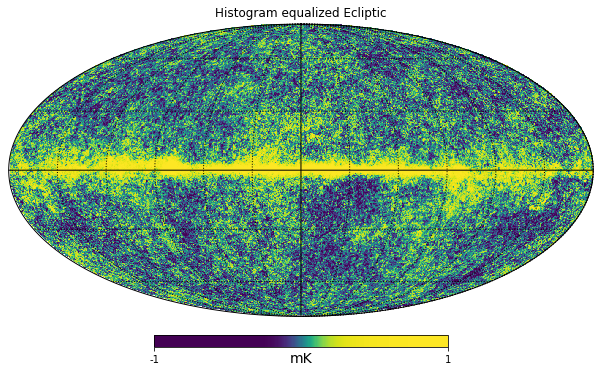

In [4]:
##### next I follow notebook: https://healpy.readthedocs.io/en/latest/tutorial.html
hp.mollview(
    wmap_map_I,
    # coord=["G", "E"],
    title="Histogram equalized Ecliptic",
    unit="mK",
    norm="hist",
    min=-1,
    max=1,
)
hp.graticule()

In [5]:
# hp.gnomview?

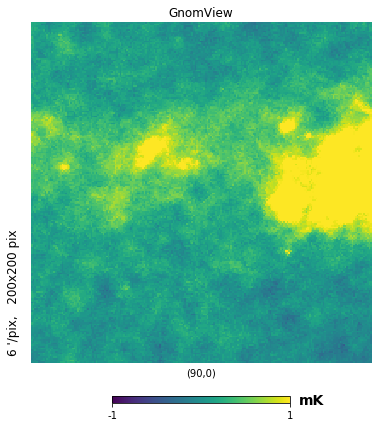

In [6]:
out=hp.gnomview(wmap_map_I, rot=[90, 0], title="GnomView", unit="mK", format="%.2g", 
                xsize = 200, ## number of pixels 
                reso = 6, ## resolution in arcmin
                # coord=["G", "E"],
                min=-1, max=1,
                return_projected_map=True)

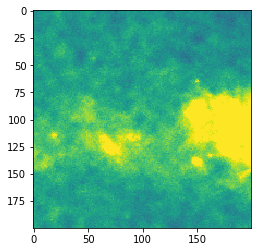

In [7]:
imshow(out,vmin=-1, vmax=1,)
show()

In [8]:
###### I should do a power spectrum test...

In [9]:
### try to access joachim's map
fname = '/global/homes/j/jharno/IA-infusion/SkySim5000/kappa/1.0060kappa.npy'
hpmap = np.load(fname)

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


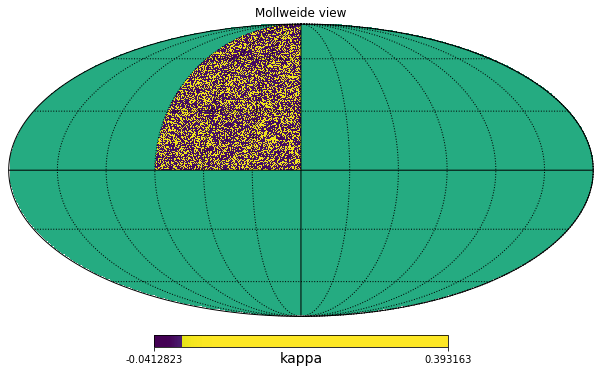

In [12]:
hp.mollview(
   hpmap,
    # coord=["G", "E"],
    # title="Histogram equalized Ecliptic",
    unit="kappa",
    norm="hist",
    # min=-1,
    # max=1,
)
hp.graticule()